# Rotten Tomatoes

[Rotten Tomatoes](https://www.rottentomatoes.com/) is a popular website that aggregates reviews and ratings for movies and TV shows. It provides a comprehensive overview of the critical and audience reception of various entertainment content.

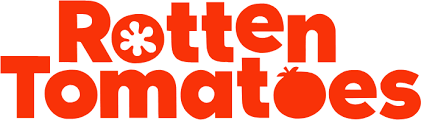

## Key Features:

- **Tomatometer:** Rotten Tomatoes' unique rating system that aggregates critic reviews to determine a movie or TV show's overall freshness.
- **Audience Score:** Reflects the opinions of the general audience, providing an additional perspective on the content's appeal.
- **Reviews:** Access a wide range of professional critic reviews and user reviews for a holistic understanding of a film or series.
- **Certified Fresh:** The Tomatometer designates movies or TV shows that have received positive reviews from critics and have a high rating.
- **Top Critics:** Highlighting reviews from the most respected and influential critics in the industry.
- **Watchlist:** Create a personalized watchlist to keep track of movies and TV shows you want to see.
- **News and Articles:** Stay updated with the latest entertainment news, reviews, and insightful articles.
- **Trailers and Clips:** View trailers and clips for upcoming releases, helping you decide what to watch next.
- **Genre and Mood Filters:** Easily find content based on your preferred genre or mood, enhancing your browsing experience.
- **Box Office and Revenue Information:** Explore the financial performance of movies, including box office numbers and revenue statistics.

Explore Rotten Tomatoes to discover what's trending, get recommendations, and make informed decisions on your next movie or TV show!

# 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from tqdm.notebook import tqdm

from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from selenium.common.exceptions import NoSuchElementException

import time

import textwrap

# 2. Create driver for web scraping

In [2]:
# Tạo tùy chọn cho Chrome
chrome_options = Options()
chrome_options.add_argument("--headless")  # Chạy Chrome ở chế độ headless, không mở cửa sổ trình duyệt

# Tạo service cho ChromeDriver
service = Service(ChromeDriverManager().install())

# Khởi tạo trình duyệt
driver = webdriver.Chrome(service=service, options=chrome_options)

AttributeError: 'str' object has no attribute 'capabilities'

In [ ]:
# Navigate to the specified URL
url = "https://www.rottentomatoes.com/browse/movies_at_home/?page=2"
driver.get(url)

click_count = 15

load_more_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//button[@data-qa="dlp-load-more-button"]'))
)

# Click the "Load more" button multiple times
for _ in tqdm(range(click_count)):
    load_more_button.click()

    # Add a wait if needed to allow the page to load after clicking
    WebDriverWait(driver, 10).until(
        EC.invisibility_of_element_located((By.XPATH, '//div[@class="loading"]'))
    )

        # Wait for 5 seconds
    time.sleep(5)

  0%|          | 0/15 [00:00<?, ?it/s]

# 3. Web Scraping

In [ ]:
#Scrap Movie Titles
ele_title = driver.find_elements(By.XPATH, '//span[@data-qa="discovery-media-list-item-title"]')
movie_titles = [title.text if title.text else None for title in ele_title]
# ------------------------

#Scrap Stream Date
ele_stream_date = driver.find_elements(By.XPATH, '//span[@data-qa="discovery-media-list-item-start-date"]')
stream_dates = [element.text[10::] for element in ele_stream_date]
# ------------------------

# Scrap items in score-pairs-deprecated
elements = driver.find_elements(By.XPATH, '//score-pairs-deprecated')

# Create lists to store each item of score-pairs-deprecated 
audience_sentiments = []
audience_scores = []
critics_sentiments = []
critics_scores = []
critics_certifieds = []

# Loop through the elements of score-pairs-deprecated and extract the required information
for element in elements:
    audience_sentiment = element.get_attribute("audiencesentiment")
    audience_score = element.get_attribute("audiencescore")
    critics_sentiment = element.get_attribute("criticssentiment")
    critics_score = element.get_attribute("criticsscore")
    criticscertified = element.get_attribute("criticscertified")

    audience_sentiments.append(audience_sentiment)
    audience_scores.append(audience_score)
    critics_sentiments.append(critics_sentiment)
    critics_scores.append(critics_score)
    critics_certifieds.append(criticscertified)
# ------------------------

# HREF
hrefs = []
ele_hrefs = driver.find_elements(By.XPATH, '//a[@data-qa="discovery-media-list-item-caption" or @data-qa="discovery-media-list-item"]')
for element in ele_hrefs:
    href_attribute = element.get_attribute("href")
    hrefs.append(href_attribute)
# ------------------------
    
# Image URL
img_urls = []
ele_img_urls = driver.find_elements(By.XPATH, '//rt-img[@class="posterImage"]')
for element in ele_img_urls:
    img_url = element.get_attribute("src")
    img_urls.append(img_url)

In [ ]:
print(len(movie_titles))
print(len(stream_dates))
print(len(audience_sentiments))
print(len(audience_scores))
print(len(critics_sentiments))
print(len(critics_scores))
print(len(hrefs))
print(len(img_urls))
print(len(critics_certifieds))

506
506
506
506
506
506
506
506
506


Look good! Let's continue

In [ ]:
df_columns_name = {
    'Movie Title': movie_titles
    ,'Stream Date': stream_dates
    ,'Audience Sentiment': audience_sentiments
    ,'Audience Score': audience_scores
    ,'Critics Sentiment': critics_sentiments
    ,'Critics Score': critics_scores
    ,'Is Certified Fresh': critics_certifieds
    ,"Link URL": hrefs
    ,"Image URL": img_urls
}

In [ ]:
df = pd.DataFrame(df_columns_name)
df.head()

,Movie Title,Stream Date,Audience Sentiment,Audience Score,Critics Sentiment,Critics Score,Is Certified Fresh,Link URL,Image URL
0,The Greatest Night in Pop,"Jan 29, 2024",positive,84,positive,97,false,https://www.rottentomatoes.com/m/the_greatest_...,https://resizing.flixster.com/rhtZhvsN_YjdHck9...
1,The Beekeeper,"Jan 30, 2024",positive,92,positive,70,false,https://www.rottentomatoes.com/m/the_beekeeper...,https://resizing.flixster.com/nwY_yVsKRdvlDMJV...
2,Wonka,"Jan 30, 2024",positive,91,positive,83,true,https://www.rottentomatoes.com/m/wonka,https://resizing.flixster.com/ZJ5aqScAhzuxf3-3...
3,Ransomed,"Jan 30, 2024",positive,71,positive,89,false,https://www.rottentomatoes.com/m/ransomed_2023,https://resizing.flixster.com/5vsjxh_NKN9TVBR-...
4,There Is a Monster,"Jan 30, 2024",,,,,false,https://www.rottentomatoes.com/m/there_is_a_mo...,https://resizing.flixster.com/0Iuq-taXjw0VHWY9...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie Title         506 non-null    object
 1   Stream Date         506 non-null    object
 2   Audience Sentiment  506 non-null    object
 3   Audience Score      506 non-null    object
 4   Critics Sentiment   506 non-null    object
 5   Critics Score       506 non-null    object
 6   Is Certified Fresh  506 non-null    object
 7   Link URL            506 non-null    object
 8   Image URL           506 non-null    object
dtypes: object(9)
memory usage: 35.7+ KB


### Test: Specified with 1 Link URL

In [ ]:
pd.set_option('display.max_column',None)

In [ ]:
#Test with URL index = 0
df['Link URL'][0]

'https://www.rottentomatoes.com/m/the_greatest_night_in_pop'

In [ ]:
# Navigate to the specified URL
url_new = df['Link URL'][0]
driver.get(url_new)

In [ ]:
# Scrap Movie Titles
try:
    ele_title = driver.find_element(By.XPATH, '//h1[@data-qa="score-panel-title"]').text
except NoSuchElementException:
    ele_title = None

# Year/Type/Duration
try:
    ele_year_type_duration = driver.find_element(By.XPATH, '//p[@data-qa="score-panel-subtitle"]').text
    ele_year = ele_year_type_duration.split(sep=',')[0].strip()
    ele_category = ele_year_type_duration.split(sep=',')[1].strip()
    ele_duration = ele_year_type_duration.split(sep=',')[2].strip()
except NoSuchElementException:
    ele_year = ele_category = ele_duration = None

# Critics Count
try:
    ele_critics_count = driver.find_element(By.XPATH, '//a[@data-qa="tomatometer-review-count"]').text
except NoSuchElementException:
    ele_critics_count = None

# Audience Rating Count
try:
    ele_audience_rating_count = driver.find_element(By.XPATH, '//a[@data-qa="audience-rating-count"]').text
except NoSuchElementException:
    ele_audience_rating_count = None

# Critics Consensus
try:
    ele_critics_consensus = driver.find_element(By.XPATH, '//span[@data-qa="critics-consensus"]').text
except NoSuchElementException:
    ele_critics_consensus = None

# Audience Consensus
try:
    ele_audience_consensus = driver.find_element(By.XPATH, '//span[@data-qa="audience-consensus"]').text
except NoSuchElementException:
    ele_audience_consensus = None

#Movie deeper info
ele_movie_info = driver.find_element(By.XPATH, '//ul[@id="info"]').text
movie_info = ele_movie_info.split(sep = '\n')
movie_dict = {}

    # Parse each line in the movie_info list and update the dictionary
for info in movie_info:
    key, value = [item.strip() for item in info.split(':', 1)]
    movie_dict[key] = value
# ------------------------
    
#Movie states in scoreboard
scoreboard_element = driver.find_element(By.XPATH, '//score-board-deprecated')

# Get the values of tomatometerstate and audiencestate
tomatometer_state = scoreboard_element.get_attribute('tomatometerstate')
audience_state = scoreboard_element.get_attribute('audiencestate')

    # Create a DataFrame from the dictionary
df_movie_info = pd.DataFrame([movie_dict])

dict_detail = {
    'Movie Title': ele_title
    ,'Year': ele_year
    ,'Category': ele_category
    ,'Duration': ele_duration
    ,'Critics Review Count': ele_critics_count
    ,'Audience Rating Count': ele_audience_rating_count
    ,'Critics Consensus': ele_critics_consensus
    ,'Audience Consensus': ele_audience_consensus
    ,'Critics State': tomatometer_state
    ,'Audience State': audience_state
}
df_detail = pd.DataFrame([dict_detail])

df_each_movie_detail = df_detail.merge(df_movie_info, left_index=True, right_index= True, how = 'inner')
df_each_movie_detail['Link URL'] = url_new
df_each_movie_detail

,Movie Title,Year,Category,Duration,Critics Review Count,Audience Rating Count,Critics Consensus,Audience Consensus,Critics State,Audience State,Rating,Genre,Original Language,Director,Producer,Release Date (Theaters),Release Date (Streaming),Runtime,Distributor,Production Co,Link URL
0,THE GREATEST NIGHT IN POP,2024,Documentary/Music,1h 36m,30 Reviews,50+ Ratings,None,None,fresh,upright,PG-13 (Some Strong Language),"Documentary, Music, History",English,Bao Nguyen,"Bruce Eskowitz, George Hencken, Larry Klein, J...","Jan 31, 2024 Limited","Jan 29, 2024",1h 36m,Netflix,"Paramount Pictures, Makemake",https://www.rottentomatoes.com/m/the_greatest_...


### Loop: Specified with all Link URL

In [ ]:
#get list of all URL
list_urls = list(df['Link URL'])

In [ ]:
len(list_urls)

506

In [ ]:
df_movie_details = pd.DataFrame()
loop_back = 0

for i in tqdm(range(0,len(list_urls) - loop_back), desc="Scraping Progress"):
    # DECLARE URL
    url_new = list_urls[i]
    driver.get(url_new)

    # PERFORM LOOPING

    # Scrap Movie Titles
    try:
        ele_title = driver.find_element(By.XPATH, '//h1[@data-qa="score-panel-title"]').text
    except:
        ele_title = None
    # ------------------------

    # Year/Type/Duration
    try:
        ele_year_type_duration = driver.find_element(By.XPATH, '//p[@data-qa="score-panel-subtitle"]').text
        ele_year = ele_year_type_duration.split(sep=',')[0].strip()
        ele_category = ele_year_type_duration.split(sep=',')[1].strip()
        ele_duration = ele_year_type_duration.split(sep=',')[2].strip()
    except:
        ele_year, ele_category, ele_duration = None, None, None
    # ------------------------

    # Critics Count
    try:
        ele_critics_count = driver.find_element(By.XPATH, '//a[@data-qa="tomatometer-review-count"]').text
    except:
        ele_critics_count = None
    # ------------------------

    # Audience Rating Count
    try:
        ele_audience_rating_count = driver.find_element(By.XPATH, '//a[@data-qa="audience-rating-count"]').text
    except:
        ele_audience_rating_count = None
    # ------------------------

    # Critics Consensus
    try:
        ele_critics_consensus = driver.find_element(By.XPATH, '//span[@data-qa="critics-consensus"]').text
    except:
        ele_critics_consensus = None
    # ------------------------

    # Audience Consensus
    try:
        ele_audience_consensus = driver.find_element(By.XPATH, '//span[@data-qa="audience-consensus"]').text
    except:
        ele_audience_consensus = None
    # ------------------------

    # Movie deeper info
    try:
        ele_movie_info = driver.find_element(By.XPATH, '//ul[@id="info"]').text
        movie_info = ele_movie_info.split(sep='\n')
        movie_dict = {}

        # Parse each line in the movie_info list and update the dictionary
        for info in movie_info:
            key, value = [item.strip() for item in info.split(':', 1)]
            movie_dict[key] = value

        # Create a DataFrame from the dictionary
        df_movie_info = pd.DataFrame([movie_dict])
    except:
        df_movie_info = pd.DataFrame()
    # ------------------------
        
    #Movie states in scoreboard
    scoreboard_element = driver.find_element(By.XPATH, '//score-board-deprecated')

    # Get the values of tomatometerstate and audiencestate
    tomatometer_state = scoreboard_element.get_attribute('tomatometerstate').strip()
    audience_state = scoreboard_element.get_attribute('audiencestate').strip()


    dict_detail = {
        'Movie Title': ele_title
        ,'Year': ele_year
        ,'Category': ele_category
        ,'Duration': ele_duration
        ,'Critics Review Count': ele_critics_count
        ,'Audience Rating Count': ele_audience_rating_count
        ,'Critics Consensus': ele_critics_consensus
        ,'Audience Consensus': ele_audience_consensus
        ,'Critics State': tomatometer_state
        ,'Audience State': audience_state
    }

    # Create a DataFrame for movie details
    df_each_movie_detail = pd.DataFrame([dict_detail])

    # Merge with df_movie_info
    df_each_movie_detail = df_each_movie_detail.merge(df_movie_info, left_index=True, right_index=True, how='inner')
    df_each_movie_detail['Link URL'] = list_urls[i]

    # Append to the main DataFrame
    df_movie_details = pd.concat([df_movie_details, df_each_movie_detail], ignore_index=True)

# Display the final DataFrame
df_movie_details.head(10)


Scraping Progress:   0%|          | 0/506 [00:00<?, ?it/s]

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=121.0.6167.140)
Stacktrace:
	GetHandleVerifier [0x00771673+52979]
	(No symbol) [0x006F7961]
	(No symbol) [0x005DDD3D]
	(No symbol) [0x005C239A]
	(No symbol) [0x0063A71B]
	(No symbol) [0x0064ACB6]
	(No symbol) [0x00634286]
	(No symbol) [0x0060C063]
	(No symbol) [0x0060CECD]
	GetHandleVerifier [0x00A88D83+3294723]
	GetHandleVerifier [0x00AC6CC2+3548482]
	GetHandleVerifier [0x00AC1C9C+3527964]
	GetHandleVerifier [0x0080870E+671630]
	(No symbol) [0x00701EB4]
	(No symbol) [0x006FD808]
	(No symbol) [0x006FD92D]
	(No symbol) [0x006EF7E0]
	BaseThreadInitThunk [0x76B9FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77877C6E+286]
	RtlGetAppContainerNamedObjectPath [0x77877C3E+238]


### Merge for final dataframe

In [ ]:
df['Movie Title'] = df['Movie Title'].str.upper()
df

,Movie Title,Stream Date,Audience Sentiment,Audience Score,Critics Sentiment,Critics Score,Is Certified Fresh,Link URL,Image URL
0,THE GREATEST NIGHT IN POP,"Jan 29, 2024",positive,84,positive,97,false,https://www.rottentomatoes.com/m/the_greatest_...,https://resizing.flixster.com/rhtZhvsN_YjdHck9...
1,THE BEEKEEPER,"Jan 30, 2024",positive,92,positive,70,false,https://www.rottentomatoes.com/m/the_beekeeper...,https://resizing.flixster.com/nwY_yVsKRdvlDMJV...
2,WONKA,"Jan 30, 2024",positive,91,positive,83,true,https://www.rottentomatoes.com/m/wonka,https://resizing.flixster.com/ZJ5aqScAhzuxf3-3...
3,RANSOMED,"Jan 30, 2024",positive,71,positive,89,false,https://www.rottentomatoes.com/m/ransomed_2023,https://resizing.flixster.com/5vsjxh_NKN9TVBR-...
4,THERE IS A MONSTER,"Jan 30, 2024",,,,,false,https://www.rottentomatoes.com/m/there_is_a_mo...,https://resizing.flixster.com/0Iuq-taXjw0VHWY9...
...,...,...,...,...,...,...,...,...,...
141,DON'T WORRY DARLING,"Oct 25, 2022",positive,74,negative,38,false,https://www.rottentomatoes.com/m/dont_worry_da...,https://resizing.flixster.com/GPYsgqs8ZMIXUb7k...
142,BLUE BEETLE,"Sep 26, 2023",positive,91,positive,78,true,https://www.rottentomatoes.com/m/blue_beetle,https://resizing.flixster.com/jLI0bBXHv_QWCiny...
143,TOP GUN: MAVERICK,"Aug 22, 2022",positive,99,positive,96,true,https://www.rottentomatoes.com/m/top_gun_maverick,https://resizing.flixster.com/UuyjwlbRE17UP6ot...
144,HYPNOTIC,"May 30, 2023",positive,62,negative,32,false,https://www.rottentomatoes.com/m/hypnotic_2023,https://resizing.flixster.com/M2jPmWBFMDLL9r3W...


In [ ]:
df_final = df.merge(df_movie_details, on = ['Movie Title', 'Link URL'], how = 'inner')
df_final.head()

,Movie Title,Stream Date,Audience Sentiment,Audience Score,Critics Sentiment,Critics Score,Is Certified Fresh,Link URL,Image URL,Year,Category,Duration,Critics Review Count,Audience Rating Count,Critics Consensus,Audience Consensus,Critics State,Audience State,Rating,Genre,Original Language,Director,Producer,Release Date (Theaters),Release Date (Streaming),Runtime,Distributor,Production Co,Writer,Box Office (Gross USA),Aspect Ratio,Sound Mix,View the collection,Rerelease Date (Theaters)
0,THE GREATEST NIGHT IN POP,"Jan 29, 2024",positive,84,positive,97,false,https://www.rottentomatoes.com/m/the_greatest_...,https://resizing.flixster.com/rhtZhvsN_YjdHck9...,2024,Documentary/Music,1h 36m,30 Reviews,50+ Ratings,None,None,fresh,upright,PG-13 (Some Strong Language),"Documentary, Music, History",English,Bao Nguyen,"Bruce Eskowitz, George Hencken, Larry Klein, J...","Jan 31, 2024 Limited","Jan 29, 2024",1h 36m,Netflix,"Paramount Pictures, Makemake",NaN,NaN,NaN,NaN,NaN,NaN
1,THE BEEKEEPER,"Jan 30, 2024",positive,92,positive,70,false,https://www.rottentomatoes.com/m/the_beekeeper...,https://resizing.flixster.com/nwY_yVsKRdvlDMJV...,2024,Action/Mystery & thriller,1h 45m,161 Reviews,"1,000+ Verified Ratings",Cheerfully undemanding and enjoyably retrograd...,"Fast-paced and full of action, The Beekeeper d...",fresh,upright,R (Pervasive Language|Drug Use|Some Sexual Ref...,"Action, Mystery & thriller",English,David Ayer,"Bill Block, Jason Statham, Chris Long, Kurt Wi...","Jan 12, 2024 Wide","Jan 30, 2024",1h 45m,MGM,"Miramax, Cedar Park Studios",Kurt Wimmer,$41.5M,Digital 2.39:1,NaN,NaN,NaN
2,WONKA,"Jan 30, 2024",positive,91,positive,83,true,https://www.rottentomatoes.com/m/wonka,https://resizing.flixster.com/ZJ5aqScAhzuxf3-3...,2023,Kids & family/Musical,1h 56m,310 Reviews,"5,000+ Verified Ratings",With director Paul King at the helm and some s...,As long as you go in ready to take it on its o...,certified-fresh,upright,PG (Some Violence|Mild Language|Thematic Eleme...,"Kids & family, Musical, Comedy, Fantasy",English,Paul King,"David Heyman, Alexandra Derbyshire, Luke Kelly","Dec 15, 2023 Wide","Jan 30, 2024",1h 56m,Warner Bros. Pictures,Heyday Films,"Simon Farnaby, Paul King",$194.9M,Digital 2.39:1,"Dolby Atmos, Dolby Digital",NaN,NaN
3,RANSOMED,"Jan 30, 2024",positive,71,positive,89,false,https://www.rottentomatoes.com/m/ransomed_2023,https://resizing.flixster.com/5vsjxh_NKN9TVBR-...,2023,Drama/Action,2h 12m,9 Reviews,Fewer than 50 Ratings,None,None,fresh,upright,NaN,"Drama, Action, Comedy, Mystery & thriller",Korean,Kim Seong-hun,NaN,"Aug 4, 2023 Limited","Jan 30, 2024",2h 12m,Well Go USA Entertainment,NaN,"Kim Jung-Yeon, Yeo Jung-mi",$142.1K,NaN,NaN,NaN,NaN
4,THERE IS A MONSTER,"Jan 30, 2024",,,,,false,https://www.rottentomatoes.com/m/there_is_a_mo...,https://resizing.flixster.com/0Iuq-taXjw0VHWY9...,2024,Drama/Horror,1h 22m,2 Reviews,None,None,None,,,NaN,"Drama, Horror, Mystery & thriller",English,Mike Taylor,Mike Taylor,NaN,"Jan 30, 2024",1h 22m,Gravitas Ventures,There is a Monster,Mike Taylor,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Movie Title                146 non-null    object
 1   Stream Date                146 non-null    object
 2   Audience Sentiment         146 non-null    object
 3   Audience Score             146 non-null    object
 4   Critics Sentiment          146 non-null    object
 5   Critics Score              146 non-null    object
 6   Is Certified Fresh         146 non-null    object
 7   Link URL                   146 non-null    object
 8   Image URL                  146 non-null    object
 9   Year                       146 non-null    object
 10  Category                   146 non-null    object
 11  Duration                   146 non-null    object
 12  Critics Review Count       141 non-null    object
 13  Audience Rating Count      141 non-null    object
 14  Critics Co

In [ ]:
print('No. of Rows:', df_final.shape[0])
print('No. of Columns:',df_final.shape[1])

No. of Rows: 146
No. of Columns: 34


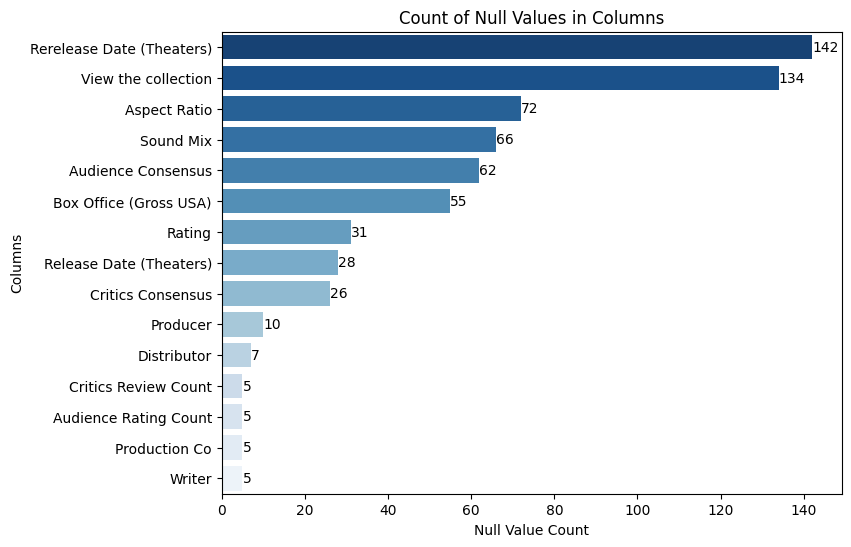

In [ ]:
null_counts = df_final.isna().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(y=null_counts.index, x=null_counts.values, palette= 'Blues_r')
plt.title('Count of Null Values in Columns')
plt.ylabel('Columns')
plt.xlabel('Null Value Count')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [ ]:
df_final.duplicated().sum()

0

Even though there are several null values, I won't drop them as this project is not focusing on data cleaning

Let's screening through some information I've collected from [Rotten Tomatoes](https://www.rottentomatoes.com/about):  
<b>1. About Critics Score:</b>
- Certified Fresh (75%-100%): Wide-release films with a score of 75% or higher that are reviewed by at least 80 critics, of whom 5 are "Top Critics", are given this seal. The "Certified Fresh" seal remains until the score drops below 70%. Films with limited releases require only 40 reviews (including 5 from "Top Critics") to qualify for this seal. For TV shows, only individual seasons are eligible for consideration, and each must have at least 20 critic reviews.
- Fresh (60%-100%): Films or TV shows with a score of 60% or higher that do not meet the requirements for the "Certified Fresh" seal.
- Rotten (0%-59%): Films or TV shows with a score of 59% or lower receive this seal.

<b>2. About Audience Score:</b>
- Each movie features a "user average", which calculates the percentage of registered users who have rated the film positively on a 5-star scale, similar to calculation of recognized critics' reviews.  
- On May 24, 2019, Rotten Tomatoes introduced a verified rating system that would replace the earlier system where users were merely required to register in order to submit a rating. So, in addition to creating an account, users will have to verify their ticket purchase through Fandango Media, a ticketing company which Rotten Tomatoes is a subsidiary of. While users can still leave reviews without verifying, those reviews will not account for the average audience score displayed next to the Tomatometer

In [ ]:
df_final.head(3)

,Movie Title,Stream Date,Audience Sentiment,Audience Score,Critics Sentiment,Critics Score,Is Certified Fresh,Link URL,Image URL,Year,Category,Duration,Critics Review Count,Audience Rating Count,Critics Consensus,Audience Consensus,Critics State,Audience State,Rating,Genre,Original Language,Director,Producer,Release Date (Theaters),Release Date (Streaming),Runtime,Distributor,Production Co,Writer,Box Office (Gross USA),Aspect Ratio,Sound Mix,View the collection,Rerelease Date (Theaters)
0,THE GREATEST NIGHT IN POP,"Jan 29, 2024",positive,84,positive,97,false,https://www.rottentomatoes.com/m/the_greatest_...,https://resizing.flixster.com/rhtZhvsN_YjdHck9...,2024,Documentary/Music,1h 36m,30 Reviews,50+ Ratings,None,None,fresh,upright,PG-13 (Some Strong Language),"Documentary, Music, History",English,Bao Nguyen,"Bruce Eskowitz, George Hencken, Larry Klein, J...","Jan 31, 2024 Limited","Jan 29, 2024",1h 36m,Netflix,"Paramount Pictures, Makemake",NaN,NaN,NaN,NaN,NaN,NaN
1,THE BEEKEEPER,"Jan 30, 2024",positive,92,positive,70,false,https://www.rottentomatoes.com/m/the_beekeeper...,https://resizing.flixster.com/nwY_yVsKRdvlDMJV...,2024,Action/Mystery & thriller,1h 45m,161 Reviews,"1,000+ Verified Ratings",Cheerfully undemanding and enjoyably retrograd...,"Fast-paced and full of action, The Beekeeper d...",fresh,upright,R (Pervasive Language|Drug Use|Some Sexual Ref...,"Action, Mystery & thriller",English,David Ayer,"Bill Block, Jason Statham, Chris Long, Kurt Wi...","Jan 12, 2024 Wide","Jan 30, 2024",1h 45m,MGM,"Miramax, Cedar Park Studios",Kurt Wimmer,$41.5M,Digital 2.39:1,NaN,NaN,NaN
2,WONKA,"Jan 30, 2024",positive,91,positive,83,true,https://www.rottentomatoes.com/m/wonka,https://resizing.flixster.com/ZJ5aqScAhzuxf3-3...,2023,Kids & family/Musical,1h 56m,310 Reviews,"5,000+ Verified Ratings",With director Paul King at the helm and some s...,As long as you go in ready to take it on its o...,certified-fresh,upright,PG (Some Violence|Mild Language|Thematic Eleme...,"Kids & family, Musical, Comedy, Fantasy",English,Paul King,"David Heyman, Alexandra Derbyshire, Luke Kelly","Dec 15, 2023 Wide","Jan 30, 2024",1h 56m,Warner Bros. Pictures,Heyday Films,"Simon Farnaby, Paul King",$194.9M,Digital 2.39:1,"Dolby Atmos, Dolby Digital",NaN,NaN


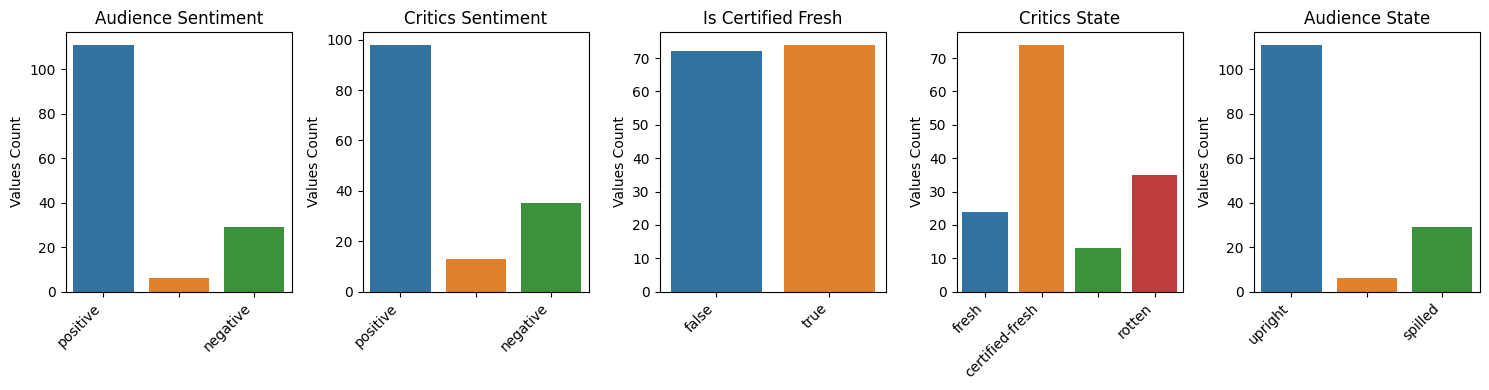

In [ ]:
to_count = ['Audience Sentiment', 'Critics Sentiment', 'Is Certified Fresh', 'Critics State', 'Audience State']

fig,axes = plt.subplots(nrows=1, ncols=len(to_count),figsize =(15, 4))
for i, col in enumerate(to_count):
    ax = sns.countplot(x=df_final[col], ax=axes[i])
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Values Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

We can see that those columns contain "blank" values because the we can't crawl them from XPATH. 
- Audience Sentiment = blank so Audience Score also = blank
- Critics Sentiment = blank so Critics Score also = blank   
We have to deal with them as below:

In [ ]:
df_final['Audience Sentiment'] = df_final['Audience Sentiment'].str.strip().replace('','Undefined')
df_final['Critics Sentiment'] = df_final['Critics Sentiment'].str.strip().replace('','Undefined')

df_final['Audience State'] = df_final['Audience State'].str.strip().replace('','Undefined')
df_final['Critics State'] = df_final['Critics State'].str.strip().replace('','Undefined')

df_final['Audience Score'] = df_final['Audience Score'].str.strip().replace('','0')
df_final['Critics Score'] = df_final['Critics Score'].str.strip().replace('','0')

I will re-try plotting them

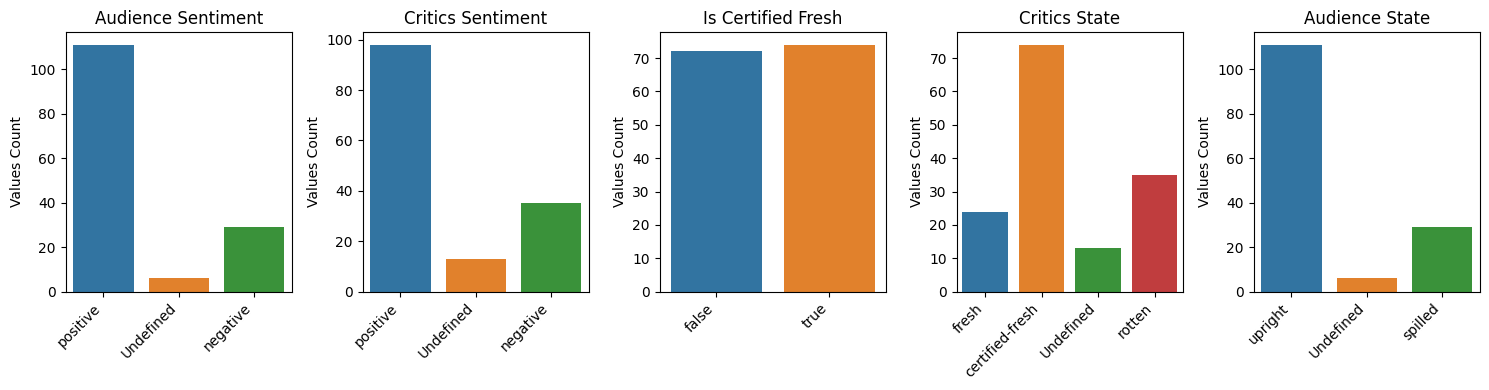

In [ ]:
to_count = ['Audience Sentiment', 'Critics Sentiment', 'Is Certified Fresh', 'Critics State', 'Audience State']

fig,axes = plt.subplots(nrows=1, ncols=len(to_count),figsize =(15, 4))
for i, col in enumerate(to_count):
    ax = sns.countplot(x=df_final[col], ax=axes[i])
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Values Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

So, all the "blank" values were replaced by Undefined values. Keep in mind that the remaining task of mine is about changing the data type for each columns

In [ ]:
df_final['Audience Score'] = df_final['Audience Score'].astype('int64')
df_final['Critics Score'] = df_final['Critics Score'].astype('int64')

In [ ]:
df_final['Box Office (Gross USA)'].unique()

array([nan, '$41.5M', '$194.9M', '$142.1K', '$4.2M', '$19.3M', '$11.4M',
       '$67.6M', '$118.0M', '$13.8M', '$101.0M', '$18.4M', '$47.2M',
       '$328.1M', '$9.9M', '$26.7M', '$61.2M', '$40.8M', '$63.5M',
       '$636.2M', '$84.5M', '$172.0M', '$137.4K', '$11.6M', '$108.3M',
       '$60.0M', '$47.6M', '$544.7K', '$166.3M', '$17.0K', '$5.8M',
       '$183.6M', '$50.2M', '$137.3M', '$4.9M', '$3.8M', '$85.8M',
       '$20.2M', '$34.2M', '$31.9M', '$40.4M', '$14.0M', '$43.0K',
       '$574.9M', '$264.7K', '$126.6M', '$3.3K', '$22.3M', '$5.3M',
       '$369.3M', '$76.7M', '$174.5M', '$12.0M', '$5.4M', '$44.2M',
       '$92.3M', '$104.9M', '$186.3M', '$188.0M', '$38.5M', '$102.3M',
       '$162.6K', '$42.4M', '$12.1M', '$381.2M', '$2.3M', '$16.9M',
       '$20.5M', '$28.1M', '$10.6M', '$86.1M', '$573.9M', '$187.1M',
       '$1.5M', '$6.7M', '$23.0K', '$142.4M', '$103.1M', '$59.9M',
       '$20.3M', '$8.1M', '$814.1M', '$17.0M', '$1.8M', '$5.1M', '$55.8M',
       '$154.4M', '$45.3M', '$72

In [ ]:
def convert_box_office(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace('$', '').replace('B', '')) * 1000000000
        elif 'M' in value:
            return float(value.replace('$', '').replace('M', '')) * 1000000
        elif 'K' in value:
            return float(value.replace('$', '').replace('K', '')) * 1000
        else:
            return float(value.replace('$', ''))
    elif isinstance(value, float):
        return value
    else:
        return None  

# Apply the function to the 'Box Office (Gross USA)' column
df_final['Box Office (Gross USA)_New'] = df_final['Box Office (Gross USA)'].apply(convert_box_office)

In [ ]:
df_final.columns

Index(['Movie Title', 'Stream Date', 'Audience Sentiment', 'Audience Score',
       'Critics Sentiment', 'Critics Score', 'Is Certified Fresh', 'Link URL',
       'Image URL', 'Year', 'Category', 'Duration', 'Critics Review Count',
       'Audience Rating Count', 'Critics Consensus', 'Audience Consensus',
       'Critics State', 'Audience State', 'Rating', 'Genre',
       'Original Language', 'Director', 'Producer', 'Release Date (Theaters)',
       'Release Date (Streaming)', 'Runtime', 'Distributor', 'Production Co',
       'Writer', 'Box Office (Gross USA)', 'Aspect Ratio', 'Sound Mix',
       'View the collection', 'Rerelease Date (Theaters)',
       'Box Office (Gross USA)_New'],
      dtype='object')

In [ ]:
df_final = df_final[
    ['Movie Title', 'Release Date (Theaters)', 'Release Date (Streaming)', 'Year', 'Genre', 'Duration'
     ,'Critics Score', 'Critics Sentiment', 'Critics State', 'Critics Review Count', 'Critics Consensus'
     ,'Audience Score', 'Audience Sentiment', 'Audience State', 'Audience Rating Count', 'Audience Consensus'
     ,'Rating','Original Language', 'Director', 'Producer', 'Writer'
     ,'Box Office (Gross USA)','Box Office (Gross USA)_New', 'Distributor', 'Production Co'
     ,'Aspect Ratio', 'Sound Mix', 'View the collection','Link URL',
       'Image URL']
]

In [ ]:
df_final.head(2)

,Movie Title,Release Date (Theaters),Release Date (Streaming),Year,Genre,Duration,Critics Score,Critics Sentiment,Critics State,Critics Review Count,Critics Consensus,Audience Score,Audience Sentiment,Audience State,Audience Rating Count,Audience Consensus,Rating,Original Language,Director,Producer,Writer,Box Office (Gross USA),Box Office (Gross USA)_New,Distributor,Production Co,Aspect Ratio,Sound Mix,View the collection,Link URL,Image URL
0,THE GREATEST NIGHT IN POP,"Jan 31, 2024 Limited","Jan 29, 2024",2024,"Documentary, Music, History",1h 36m,97,positive,fresh,30 Reviews,None,84,positive,upright,50+ Ratings,None,PG-13 (Some Strong Language),English,Bao Nguyen,"Bruce Eskowitz, George Hencken, Larry Klein, J...",NaN,NaN,NaN,Netflix,"Paramount Pictures, Makemake",NaN,NaN,NaN,https://www.rottentomatoes.com/m/the_greatest_...,https://resizing.flixster.com/rhtZhvsN_YjdHck9...
1,THE BEEKEEPER,"Jan 12, 2024 Wide","Jan 30, 2024",2024,"Action, Mystery & thriller",1h 45m,70,positive,fresh,161 Reviews,Cheerfully undemanding and enjoyably retrograd...,92,positive,upright,"1,000+ Verified Ratings","Fast-paced and full of action, The Beekeeper d...",R (Pervasive Language|Drug Use|Some Sexual Ref...,English,David Ayer,"Bill Block, Jason Statham, Chris Long, Kurt Wi...",Kurt Wimmer,$41.5M,41500000.0,MGM,"Miramax, Cedar Park Studios",Digital 2.39:1,NaN,NaN,https://www.rottentomatoes.com/m/the_beekeeper...,https://resizing.flixster.com/nwY_yVsKRdvlDMJV...


### Plotting for info

In [ ]:
df_final['Year'].value_counts().idxmax()

'2023'

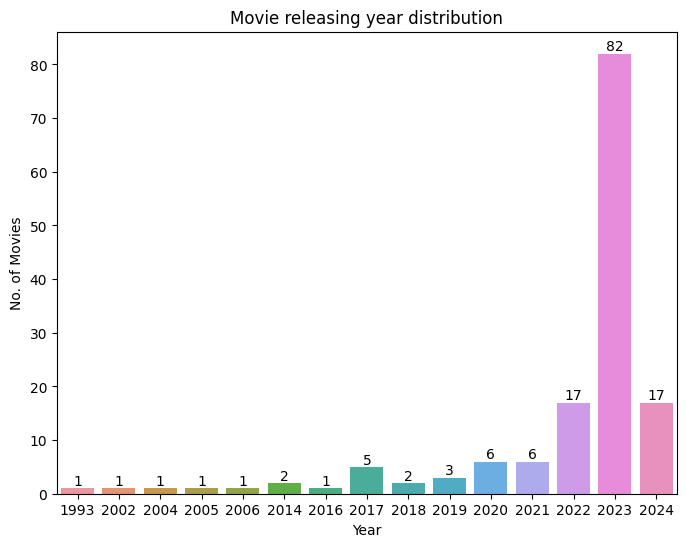

The year 2023 saw the highest number of movie releases, with a total of 82 films.


In [ ]:
max_releasing_year_value = df_final['Year'].value_counts().max()
max_releasing_year_index = df_final['Year'].value_counts().idxmax()

plt.figure(figsize = (8,6))

sorted_years = df_final['Year'].value_counts().sort_index()
ax = sns.countplot(x=df_final['Year'], order=sorted_years.index)
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
ax.set_title('Movie releasing year distribution')


for i in ax.containers:
    ax.bar_label(i, )

plt.show()

print(f'The year {max_releasing_year_index} saw the highest number of movie releases, with a total of {max_releasing_year_value} films.')

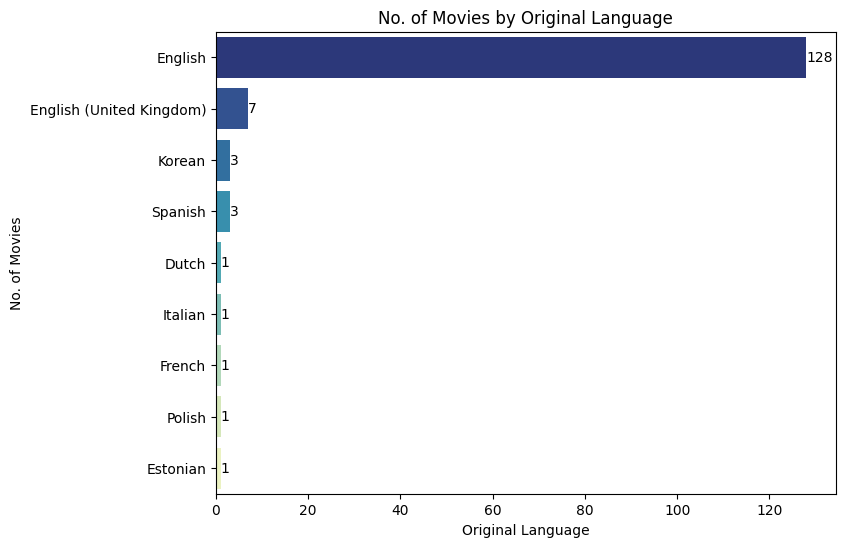

Most of the Movies are in English, with a total of 128 films.


In [ ]:
max_value_lang = df_final['Original Language'].value_counts().max()
max_index_lang = df_final['Original Language'].value_counts().idxmax()

plt.figure(figsize = (8,6))

sorted_df = df_final['Original Language'].value_counts().sort_values(ascending=False)

ax = sns.barplot(x = sorted_df.values
                 , y = sorted_df.index
                 , palette = 'YlGnBu_r')
ax.set_xlabel('Original Language')
ax.set_ylabel('No. of Movies')
ax.set_title('No. of Movies by Original Language')

for i in ax.containers:
    ax.bar_label(i, )

plt.show()

print(f'Most of the Movies are in {max_index_lang}, with a total of {max_value_lang} films.')

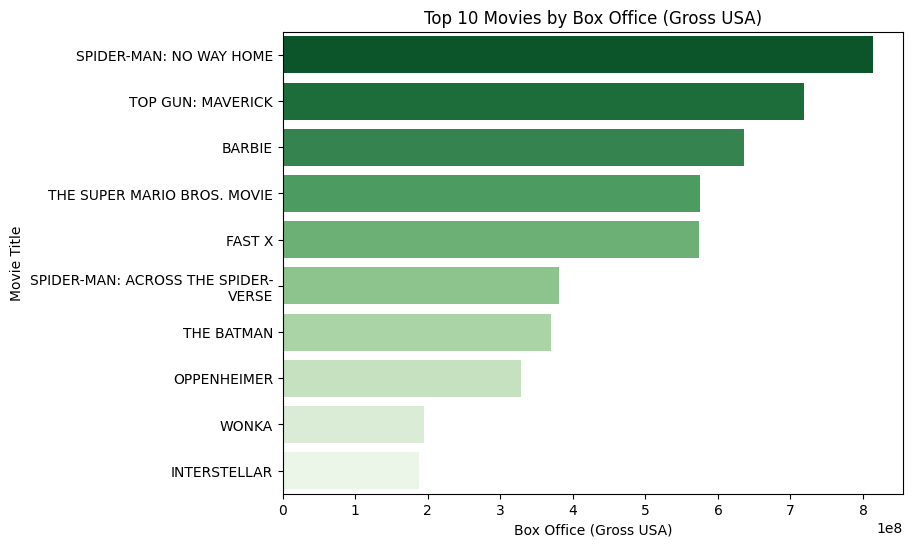

SPIDER-MAN: NO WAY HOME is the movie that brings the highest income with $814.1M - contains 9.12% in the current dataset


In [ ]:
df_top_10_box_office = df_final.sort_values(by = 'Box Office (Gross USA)_New', ascending = False)[['Movie Title', 'Box Office (Gross USA)','Box Office (Gross USA)_New']].head(10).reset_index(drop=True)
total_box_office = df_final['Box Office (Gross USA)_New'].sum()

df_top_10_box_office['box_office_pct'] = (df_top_10_box_office['Box Office (Gross USA)_New'] / total_box_office).apply('{:.2%}'.format)

max_length = 30
df_top_10_box_office['Movie Title'] = df_top_10_box_office['Movie Title'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=max_length)))


plt.figure(figsize = (8,6))

ax = sns.barplot(data = df_top_10_box_office
            ,y = 'Movie Title'
            ,x = 'Box Office (Gross USA)_New'
            ,palette='Greens_r')
ax.set_xlabel('Box Office (Gross USA)')
ax.set_ylabel('Movie Title')
ax.set_title('Top 10 Movies by Box Office (Gross USA)')

plt.show()

print(f"{df_top_10_box_office['Movie Title'][0]} is the movie that brings the highest income with {df_top_10_box_office['Box Office (Gross USA)'][0]} - contains {df_top_10_box_office['box_office_pct'][0]} in the current dataset")

In [ ]:
def convert_to_minutes(duration):
    parts = duration.split(' ')
    total_minutes = 0

    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))

    return total_minutes

# Apply the function to the 'Duration' column
df_final['Duration'] = df_final['Duration'].apply(convert_to_minutes)

df_final.head()

,Movie Title,Release Date (Theaters),Release Date (Streaming),Year,Genre,Duration,Critics Score,Critics Sentiment,Critics State,Critics Review Count,Critics Consensus,Audience Score,Audience Sentiment,Audience State,Audience Rating Count,Audience Consensus,Rating,Original Language,Director,Producer,Writer,Box Office (Gross USA),Box Office (Gross USA)_New,Distributor,Production Co,Aspect Ratio,Sound Mix,View the collection,Link URL,Image URL
0,THE GREATEST NIGHT IN POP,"Jan 31, 2024 Limited","Jan 29, 2024",2024,"Documentary, Music, History",96,97,positive,fresh,30 Reviews,None,84,positive,upright,50+ Ratings,None,PG-13 (Some Strong Language),English,Bao Nguyen,"Bruce Eskowitz, George Hencken, Larry Klein, J...",NaN,NaN,NaN,Netflix,"Paramount Pictures, Makemake",NaN,NaN,NaN,https://www.rottentomatoes.com/m/the_greatest_...,https://resizing.flixster.com/rhtZhvsN_YjdHck9...
1,THE BEEKEEPER,"Jan 12, 2024 Wide","Jan 30, 2024",2024,"Action, Mystery & thriller",105,70,positive,fresh,161 Reviews,Cheerfully undemanding and enjoyably retrograd...,92,positive,upright,"1,000+ Verified Ratings","Fast-paced and full of action, The Beekeeper d...",R (Pervasive Language|Drug Use|Some Sexual Ref...,English,David Ayer,"Bill Block, Jason Statham, Chris Long, Kurt Wi...",Kurt Wimmer,$41.5M,41500000.0,MGM,"Miramax, Cedar Park Studios",Digital 2.39:1,NaN,NaN,https://www.rottentomatoes.com/m/the_beekeeper...,https://resizing.flixster.com/nwY_yVsKRdvlDMJV...
2,WONKA,"Dec 15, 2023 Wide","Jan 30, 2024",2023,"Kids & family, Musical, Comedy, Fantasy",116,83,positive,certified-fresh,310 Reviews,With director Paul King at the helm and some s...,91,positive,upright,"5,000+ Verified Ratings",As long as you go in ready to take it on its o...,PG (Some Violence|Mild Language|Thematic Eleme...,English,Paul King,"David Heyman, Alexandra Derbyshire, Luke Kelly","Simon Farnaby, Paul King",$194.9M,194900000.0,Warner Bros. Pictures,Heyday Films,Digital 2.39:1,"Dolby Atmos, Dolby Digital",NaN,https://www.rottentomatoes.com/m/wonka,https://resizing.flixster.com/ZJ5aqScAhzuxf3-3...
3,RANSOMED,"Aug 4, 2023 Limited","Jan 30, 2024",2023,"Drama, Action, Comedy, Mystery & thriller",132,89,positive,fresh,9 Reviews,None,71,positive,upright,Fewer than 50 Ratings,None,NaN,Korean,Kim Seong-hun,NaN,"Kim Jung-Yeon, Yeo Jung-mi",$142.1K,142100.0,Well Go USA Entertainment,NaN,NaN,NaN,NaN,https://www.rottentomatoes.com/m/ransomed_2023,https://resizing.flixster.com/5vsjxh_NKN9TVBR-...
4,THERE IS A MONSTER,NaN,"Jan 30, 2024",2024,"Drama, Horror, Mystery & thriller",82,0,Undefined,Undefined,2 Reviews,None,0,Undefined,Undefined,None,None,NaN,English,Mike Taylor,Mike Taylor,Mike Taylor,NaN,NaN,Gravitas Ventures,There is a Monster,NaN,NaN,NaN,https://www.rottentomatoes.com/m/there_is_a_mo...,https://resizing.flixster.com/0Iuq-taXjw0VHWY9...


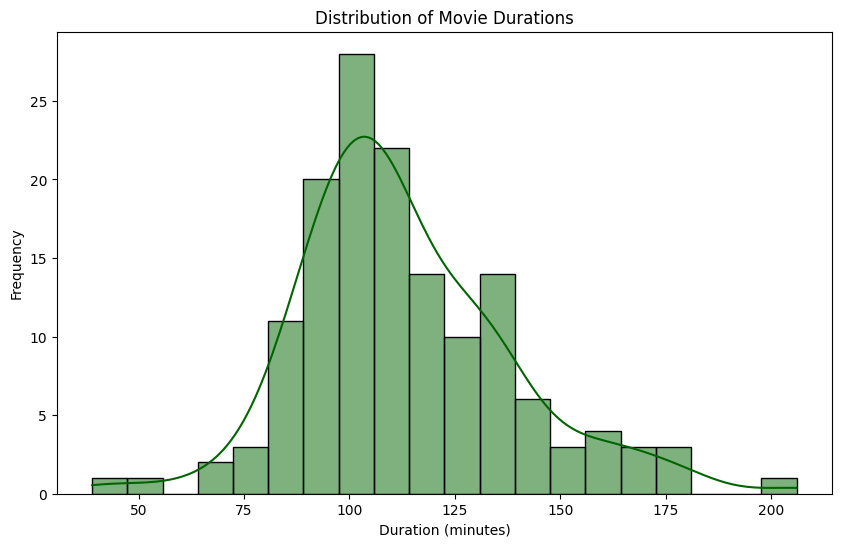

Highest frequency range: 97.0 to 106.0 minutes


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final
                            , x='Duration'
                            , kde=True
                            , bins=20
                            , color='darkgreen')
hist, bins, _ = plt.hist(df_final['Duration'], bins=20, color='darkgreen', alpha=0)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

highest_bin_start = round(bins[hist.argmax()],0)
highest_bin_end = round(bins[hist.argmax() + 1],0)

print(f'Highest frequency range: {highest_bin_start} to {highest_bin_end} minutes')

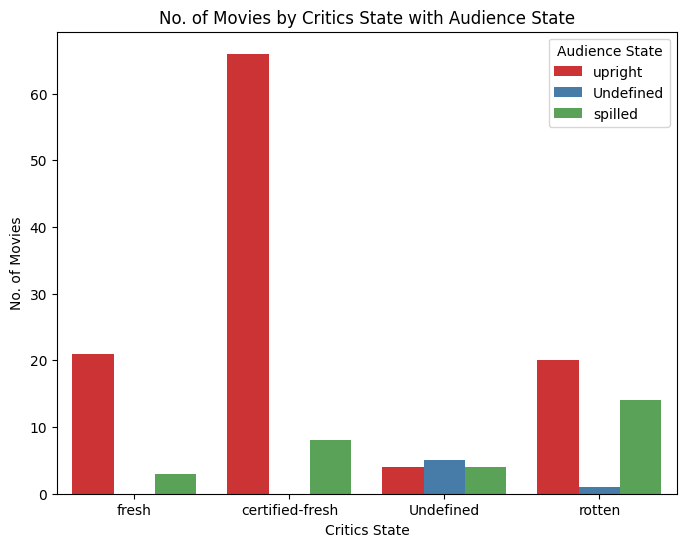

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df_final, x='Critics State', hue='Audience State', palette='Set1')
plt.title('No. of Movies by Critics State with Audience State')
plt.ylabel('No. of Movies')

plt.show()

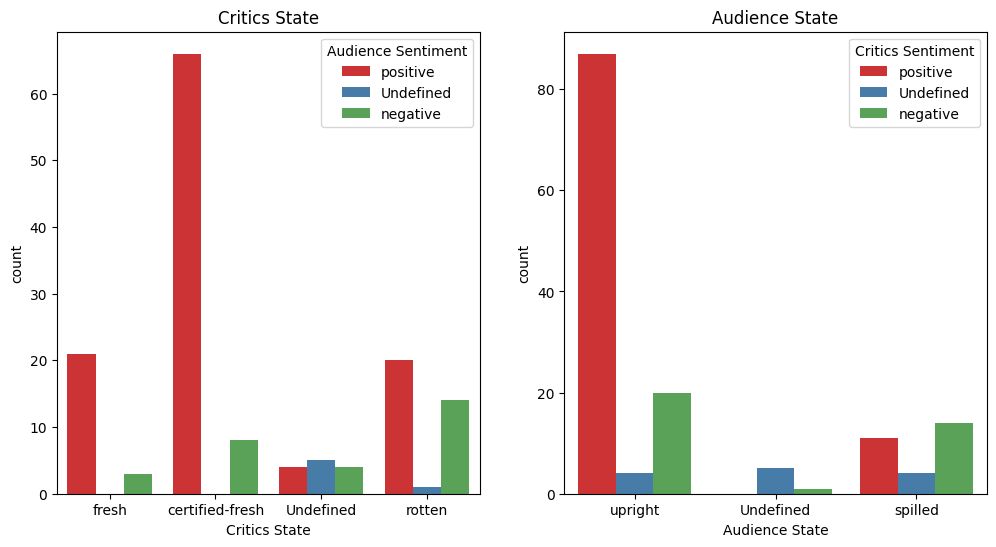

In [ ]:
plt.figure(figsize=(12, 6))

# Plot count values for 'Critics State'
plt.subplot(1, 2, 1)
sns.countplot(data=df_final, x='Critics State', palette='Set1', hue = 'Audience Sentiment')
plt.title('Critics State')

# Plot count values for 'Audience State'
plt.subplot(1, 2, 2)
sns.countplot(data=df_final, x='Audience State', palette='Set1', hue = 'Critics Sentiment')
plt.title('Audience State')

plt.show()

# 5. NTLK VADER

In [ ]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from wordcloud import WordCloud
from pprint import pprint

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-

True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
df_final['Critics Consensus'] = df_final['Critics Consensus'].fillna('_')
df_final['Audience Consensus'] = df_final['Audience Consensus'].fillna('_')

df_final['Critics Consensus Text'] = df_final['Critics Consensus'].apply(remove_stopwords)
df_final['Audience Consensus Text'] = df_final['Audience Consensus'].apply(remove_stopwords)

In [ ]:
df_final['Consensus'] = df_final['Audience Consensus'] + ' ' + df_final['Critics Consensus']
df_final['Consensus Text'] = df_final['Consensus'].apply(remove_stopwords)

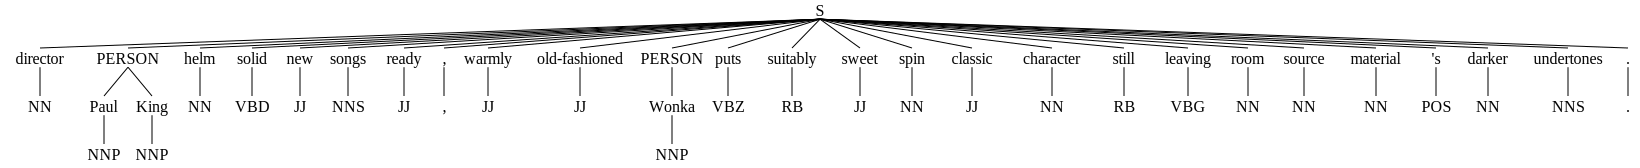

In [ ]:
test_text = df_final['Critics Consensus Text'][2]
tokens = nltk.word_tokenize(test_text)
tags = nltk.pos_tag(tokens)
entities = nltk.ne_chunk(tags)
entities

In [ ]:
sia = SentimentIntensityAnalyzer()

critics_pol_list = []
audience_pol_list = []
pol_list = []

for critics_text in tqdm(df_final['Critics Consensus Text']):
    critics_pol =  sia.polarity_scores(critics_text)
    critics_pol_list.append(critics_pol)

for audience_text in tqdm(df_final['Audience Consensus Text']):
    audience_pol =  sia.polarity_scores(audience_text)
    audience_pol_list.append(audience_pol)

for text in tqdm(df_final['Consensus Text']):
    pol =  sia.polarity_scores(text)
    pol_list.append(pol)

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

In [ ]:
df_final.head()

,Movie Title,Release Date (Theaters),Release Date (Streaming),Year,Genre,Duration,Critics Score,Critics Sentiment,Critics State,Critics Review Count,Critics Consensus,Audience Score,Audience Sentiment,Audience State,Audience Rating Count,Audience Consensus,Rating,Original Language,Director,Producer,Writer,Box Office (Gross USA),Box Office (Gross USA)_New,Distributor,Production Co,Aspect Ratio,Sound Mix,View the collection,Link URL,Image URL,Critics Consensus Text,Audience Consensus Text,Consensus,Consensus Text
0,THE GREATEST NIGHT IN POP,"Jan 31, 2024 Limited","Jan 29, 2024",2024,"Documentary, Music, History",96,97,positive,fresh,30 Reviews,_,84,positive,upright,50+ Ratings,_,PG-13 (Some Strong Language),English,Bao Nguyen,"Bruce Eskowitz, George Hencken, Larry Klein, J...",NaN,NaN,NaN,Netflix,"Paramount Pictures, Makemake",NaN,NaN,NaN,https://www.rottentomatoes.com/m/the_greatest_...,https://resizing.flixster.com/rhtZhvsN_YjdHck9...,_,_,_ _,_ _
1,THE BEEKEEPER,"Jan 12, 2024 Wide","Jan 30, 2024",2024,"Action, Mystery & thriller",105,70,positive,fresh,161 Reviews,Cheerfully undemanding and enjoyably retrograd...,92,positive,upright,"1,000+ Verified Ratings","Fast-paced and full of action, The Beekeeper d...",R (Pervasive Language|Drug Use|Some Sexual Ref...,English,David Ayer,"Bill Block, Jason Statham, Chris Long, Kurt Wi...",Kurt Wimmer,$41.5M,41500000.0,MGM,"Miramax, Cedar Park Studios",Digital 2.39:1,NaN,NaN,https://www.rottentomatoes.com/m/the_beekeeper...,https://resizing.flixster.com/nwY_yVsKRdvlDMJV...,"Cheerfully undemanding enjoyably retrograde, B...","Fast-paced full action, Beekeeper delivers eve...","Fast-paced and full of action, The Beekeeper d...","Fast-paced full action, Beekeeper delivers eve..."
2,WONKA,"Dec 15, 2023 Wide","Jan 30, 2024",2023,"Kids & family, Musical, Comedy, Fantasy",116,83,positive,certified-fresh,310 Reviews,With director Paul King at the helm and some s...,91,positive,upright,"5,000+ Verified Ratings",As long as you go in ready to take it on its o...,PG (Some Violence|Mild Language|Thematic Eleme...,English,Paul King,"David Heyman, Alexandra Derbyshire, Luke Kelly","Simon Farnaby, Paul King",$194.9M,194900000.0,Warner Bros. Pictures,Heyday Films,Digital 2.39:1,"Dolby Atmos, Dolby Digital",NaN,https://www.rottentomatoes.com/m/wonka,https://resizing.flixster.com/ZJ5aqScAhzuxf3-3...,"director Paul King helm solid new songs ready,...","long go ready take terms, Wonka funny, heartwa...",As long as you go in ready to take it on its o...,"long go ready take terms, Wonka funny, heartwa..."
3,RANSOMED,"Aug 4, 2023 Limited","Jan 30, 2024",2023,"Drama, Action, Comedy, Mystery & thriller",132,89,positive,fresh,9 Reviews,_,71,positive,upright,Fewer than 50 Ratings,_,NaN,Korean,Kim Seong-hun,NaN,"Kim Jung-Yeon, Yeo Jung-mi",$142.1K,142100.0,Well Go USA Entertainment,NaN,NaN,NaN,NaN,https://www.rottentomatoes.com/m/ransomed_2023,https://resizing.flixster.com/5vsjxh_NKN9TVBR-...,_,_,_ _,_ _
4,THERE IS A MONSTER,NaN,"Jan 30, 2024",2024,"Drama, Horror, Mystery & thriller",82,0,Undefined,Undefined,2 Reviews,_,0,Undefined,Undefined,None,_,NaN,English,Mike Taylor,Mike Taylor,Mike Taylor,NaN,NaN,Gravitas Ventures,There is a Monster,NaN,NaN,NaN,https://www.rottentomatoes.com/m/there_is_a_mo...,https://resizing.flixster.com/0Iuq-taXjw0VHWY9...,_,_,_ _,_ _


In [ ]:
df_pol_critics = pd.DataFrame(critics_pol_list)

df_pol_critics['Movie Title'] = df_final['Movie Title'] 
df_pol_critics['Critics Score'] = df_final['Critics Score']
df_pol_critics['Critics Consensus'] = df_final['Critics Consensus']
df_pol_critics['Critics Sentiment'] = df_final['Critics Sentiment']

df_pol_critics

,neg,neu,pos,compound,Movie Title,Critics Score,Critics Consensus,Critics Sentiment
0,0.000,0.000,0.000,0.0000,THE GREATEST NIGHT IN POP,97,_,positive
1,0.112,0.437,0.451,0.7906,THE BEEKEEPER,70,Cheerfully undemanding and enjoyably retrograd...,positive
2,0.000,0.671,0.329,0.8316,WONKA,83,With director Paul King at the helm and some s...,positive
3,0.000,0.000,0.000,0.0000,RANSOMED,89,_,positive
4,0.000,0.000,0.000,0.0000,THERE IS A MONSTER,0,_,Undefined
...,...,...,...,...,...,...,...,...
141,0.249,0.571,0.181,-0.1109,DON'T WORRY DARLING,38,Despite an intriguing array of talent on eithe...,negative
142,0.000,0.877,0.123,0.2732,BLUE BEETLE,78,Led by Xolo Maridueña's magnetic performance i...,positive
143,0.180,0.614,0.206,0.1531,TOP GUN: MAVERICK,96,Top Gun: Maverick pulls off a feat even tricki...,positive
144,0.374,0.551,0.075,-0.7163,HYPNOTIC,32,Although Hypnotic isn't without glimmers of in...,negative


In [ ]:
df_pol_audience = pd.DataFrame(audience_pol_list)

df_pol_audience['Movie Title'] = df_final['Movie Title'] 
df_pol_audience['Audience Score'] = df_final['Audience Score']
df_pol_audience['Audience Consensus'] = df_final['Audience Consensus']
df_pol_audience['Audience Sentiment'] = df_final['Audience Sentiment']

df_pol_audience

,neg,neu,pos,compound,Movie Title,Audience Score,Audience Consensus,Audience Sentiment
0,0.000,0.000,0.000,0.0000,THE GREATEST NIGHT IN POP,84,_,positive
1,0.000,1.000,0.000,0.0000,THE BEEKEEPER,92,"Fast-paced and full of action, The Beekeeper d...",positive
2,0.000,0.495,0.505,0.8807,WONKA,91,As long as you go in ready to take it on its o...,positive
3,0.000,0.000,0.000,0.0000,RANSOMED,71,_,positive
4,0.000,0.000,0.000,0.0000,THERE IS A MONSTER,0,_,Undefined
...,...,...,...,...,...,...,...,...
141,0.131,0.495,0.374,0.6597,DON'T WORRY DARLING,74,"The ending isn't for everyone, but the cast --...",positive
142,0.000,0.552,0.448,0.7964,BLUE BEETLE,91,Funny with lots of action and an appealing cas...,positive
143,0.094,0.353,0.553,0.8934,TOP GUN: MAVERICK,99,If you loved the original -- or enjoy some goo...,positive
144,0.000,0.500,0.500,0.7184,HYPNOTIC,62,"Sure, Hypnotic is predictable, but it's still ...",positive


In [ ]:
df_pol = pd.DataFrame(pol_list)

df_pol['Movie Title'] = df_final['Movie Title'] 
df_pol['Critics Score'] = df_final['Critics Score']
df_pol['Audience Score'] = df_final['Audience Score']
df_pol['Avg Score'] = (df_pol['Critics Score'] + df_pol['Audience Score']) / 2


df_pol['Critics Sentiment'] = df_final['Critics Sentiment']
df_pol['Audience Sentiment'] = df_final['Audience Sentiment']

df_pol['Consensus'] = df_final['Consensus']

df_pol

,neg,neu,pos,compound,Movie Title,Critics Score,Audience Score,Avg Score,Critics Sentiment,Audience Sentiment,Consensus
0,0.000,0.000,0.000,0.0000,THE GREATEST NIGHT IN POP,97,84,90.5,positive,positive,_ _
1,0.073,0.633,0.294,0.7906,THE BEEKEEPER,70,92,81.0,positive,positive,"Fast-paced and full of action, The Beekeeper d..."
2,0.000,0.596,0.404,0.9584,WONKA,83,91,87.0,positive,positive,As long as you go in ready to take it on its o...
3,0.000,0.000,0.000,0.0000,RANSOMED,89,71,80.0,positive,positive,_ _
4,0.000,0.000,0.000,0.0000,THERE IS A MONSTER,0,0,0.0,Undefined,Undefined,_ _
...,...,...,...,...,...,...,...,...,...,...,...
141,0.188,0.532,0.280,0.6083,DON'T WORRY DARLING,38,74,56.0,negative,positive,"The ending isn't for everyone, but the cast --..."
142,0.000,0.710,0.290,0.8481,BLUE BEETLE,78,91,84.5,positive,positive,Funny with lots of action and an appealing cas...
143,0.135,0.476,0.389,0.9062,TOP GUN: MAVERICK,96,99,97.5,positive,positive,If you loved the original -- or enjoy some goo...
144,0.220,0.530,0.250,0.0062,HYPNOTIC,32,62,47.0,negative,positive,"Sure, Hypnotic is predictable, but it's still ..."


  0%|          | 0/3 [00:00<?, ?it/s]

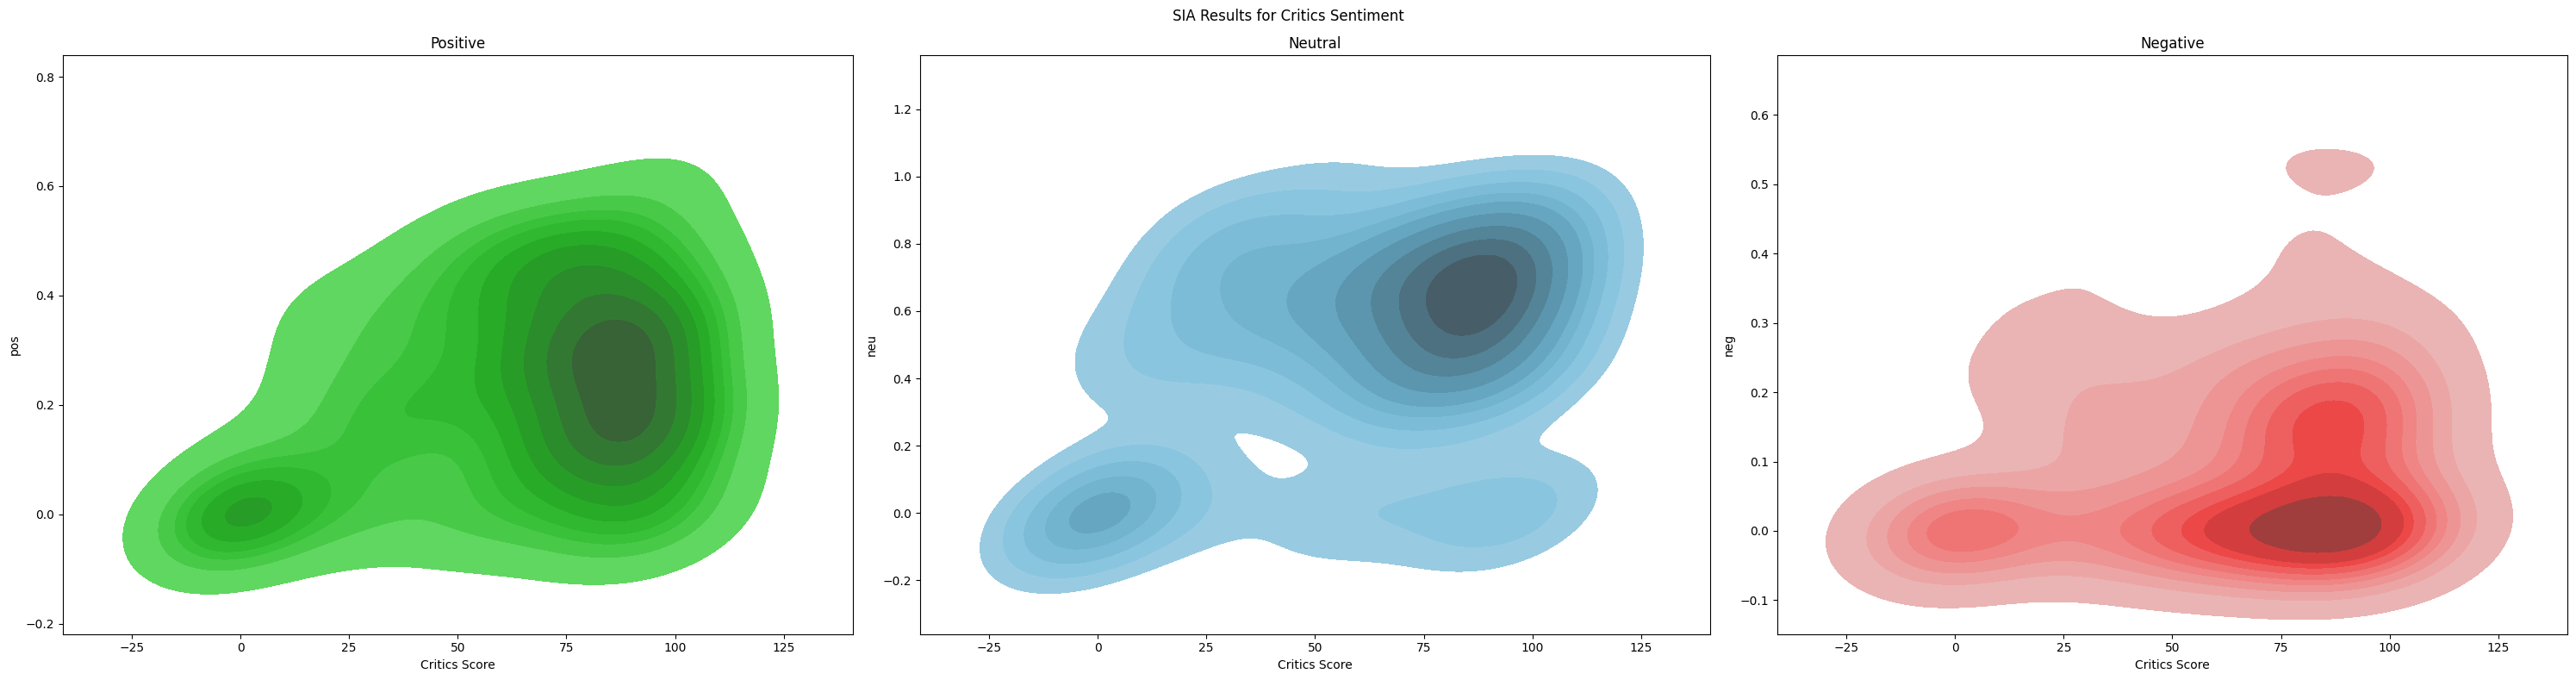

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (30,8))

pol_types = ['pos','neu','neg']
pol_names = ['Positive','Neutral','Negative']
colors = ['limegreen', 'skyblue', 'lightcoral']

n = 0

for pol_type in tqdm(pol_types):  
    sns.kdeplot(data = df_pol_critics
                ,x = 'Critics Score'
                ,y = pol_type
                ,ax = axes[n]
                ,color=colors[n]
                ,fill=True)
    axes[n].set_title(pol_names[n])
    n+=1

plt.suptitle('SIA Results for Critics Sentiment')

plt.tight_layout()
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

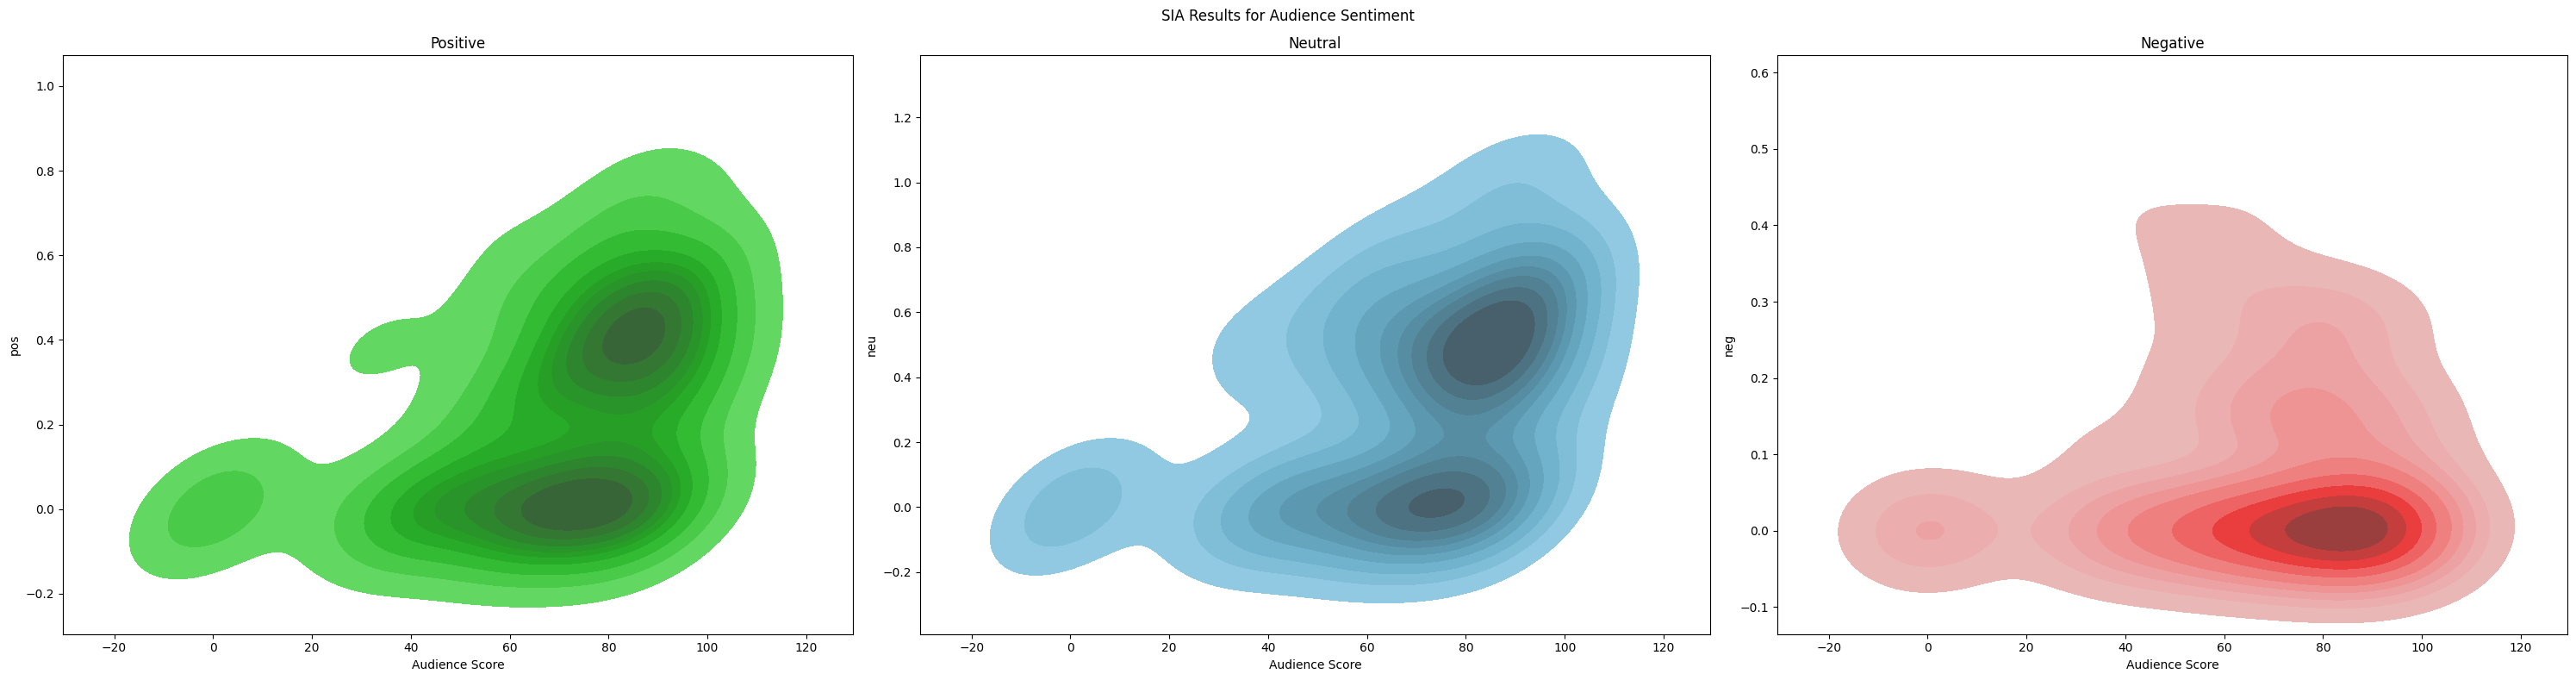

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (30,8))

pol_types = ['pos','neu','neg']
pol_names = ['Positive','Neutral','Negative']
colors = ['limegreen', 'skyblue', 'lightcoral']

n = 0

for pol_type in tqdm(pol_types):  
    sns.kdeplot(data = df_pol_audience
                ,x = 'Audience Score'
                ,y = pol_type
                ,ax = axes[n]
                ,color=colors[n]
                ,fill=True
                )
    axes[n].set_title(pol_names[n])
    n+=1

plt.suptitle('SIA Results for Audience Sentiment')

plt.tight_layout()
plt.show()

In [ ]:
df_pol

,neg,neu,pos,compound,Movie Title,Critics Score,Audience Score,Avg Score,Critics Sentiment,Audience Sentiment,Consensus
0,0.000,0.000,0.000,0.0000,THE GREATEST NIGHT IN POP,97,84,90.5,positive,positive,_ _
1,0.073,0.633,0.294,0.7906,THE BEEKEEPER,70,92,81.0,positive,positive,"Fast-paced and full of action, The Beekeeper d..."
2,0.000,0.596,0.404,0.9584,WONKA,83,91,87.0,positive,positive,As long as you go in ready to take it on its o...
3,0.000,0.000,0.000,0.0000,RANSOMED,89,71,80.0,positive,positive,_ _
4,0.000,0.000,0.000,0.0000,THERE IS A MONSTER,0,0,0.0,Undefined,Undefined,_ _
...,...,...,...,...,...,...,...,...,...,...,...
141,0.188,0.532,0.280,0.6083,DON'T WORRY DARLING,38,74,56.0,negative,positive,"The ending isn't for everyone, but the cast --..."
142,0.000,0.710,0.290,0.8481,BLUE BEETLE,78,91,84.5,positive,positive,Funny with lots of action and an appealing cas...
143,0.135,0.476,0.389,0.9062,TOP GUN: MAVERICK,96,99,97.5,positive,positive,If you loved the original -- or enjoy some goo...
144,0.220,0.530,0.250,0.0062,HYPNOTIC,32,62,47.0,negative,positive,"Sure, Hypnotic is predictable, but it's still ..."


  0%|          | 0/3 [00:00<?, ?it/s]

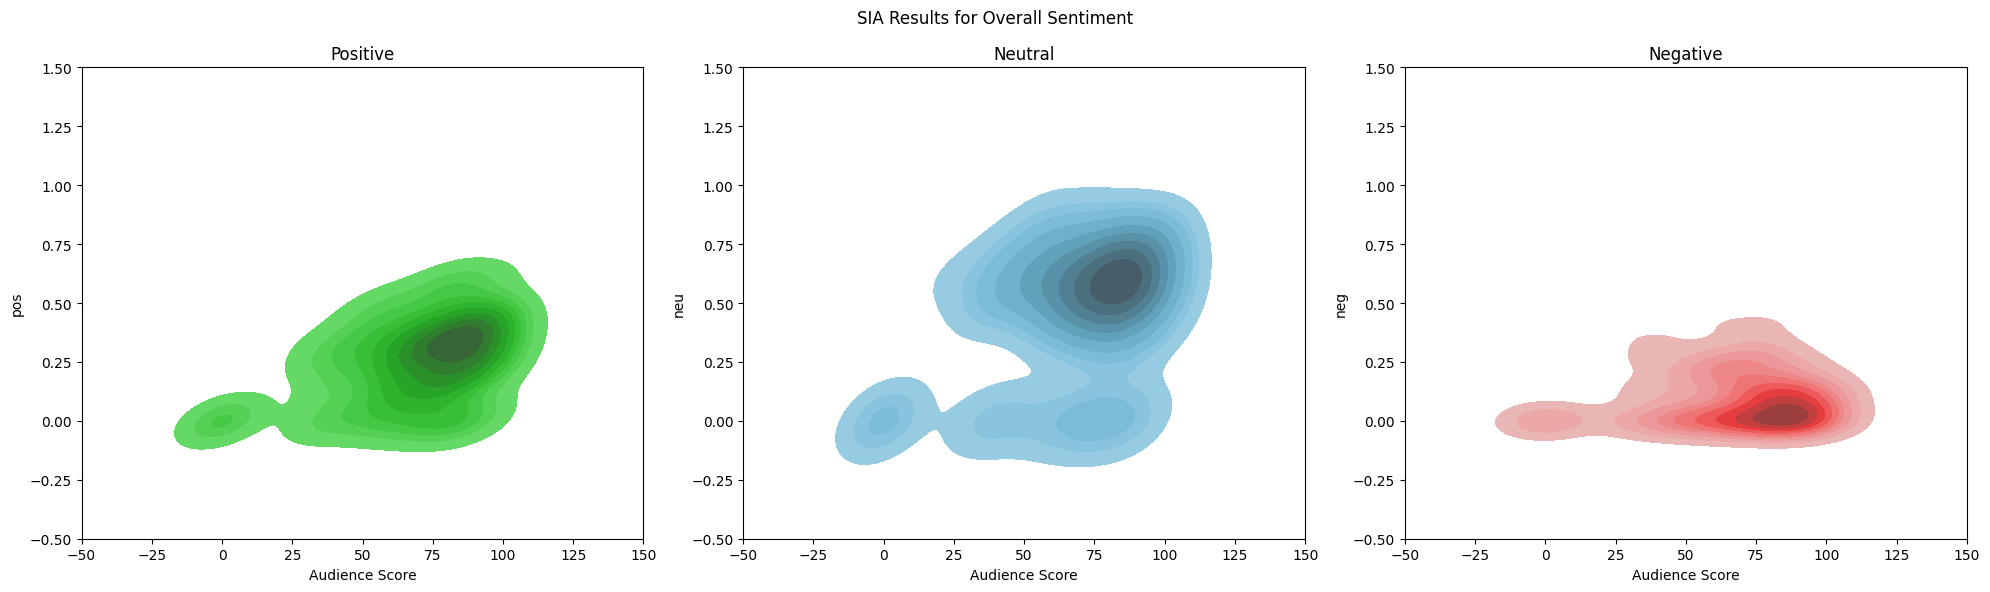

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (20,6))

pol_types = ['pos','neu','neg']
pol_names = ['Positive','Neutral','Negative']
colors = ['limegreen', 'skyblue', 'lightcoral']

n = 0

for pol_type in tqdm(pol_types):  
    sns.kdeplot(data = df_pol
                ,x = 'Audience Score'
                ,y = pol_type
                ,ax = axes[n]
                ,color=colors[n]
                ,fill = True
                )
    axes[n].set_title(pol_names[n])
    axes[n].set_xlim(-50,150)
    axes[n].set_ylim(-0.5,1.5)
    n+=1

plt.suptitle('SIA Results for Overall Sentiment')

plt.tight_layout()
plt.show()

In [ ]:
df_pol.columns

Index(['neg', 'neu', 'pos', 'compound', 'Movie Title', 'Critics Score',
       'Audience Score', 'Avg Score', 'Critics Sentiment',
       'Audience Sentiment', 'Consensus'],
      dtype='object')

In [ ]:
df_merge_vader = df_final.merge(df_pol, on = ['Movie Title', 'Critics Score',
       'Audience Score','Movie Title', 'Critics Score',
       'Audience Score', 'Critics Sentiment',
       'Audience Sentiment', 'Consensus'], how = 'inner')
df_merge_vader.loc[df_merge_vader['compound'] >= 0.5, 'VaderSegment'] = 'Positive'
df_merge_vader.loc[df_merge_vader['compound'] <= -0.5, 'VaderSegment'] = 'Negative'
df_merge_vader.loc[(df_merge_vader['compound'] < 0.5) & (df_merge_vader['compound'] > -0.5), 'VaderSegment'] = 'Neutral'

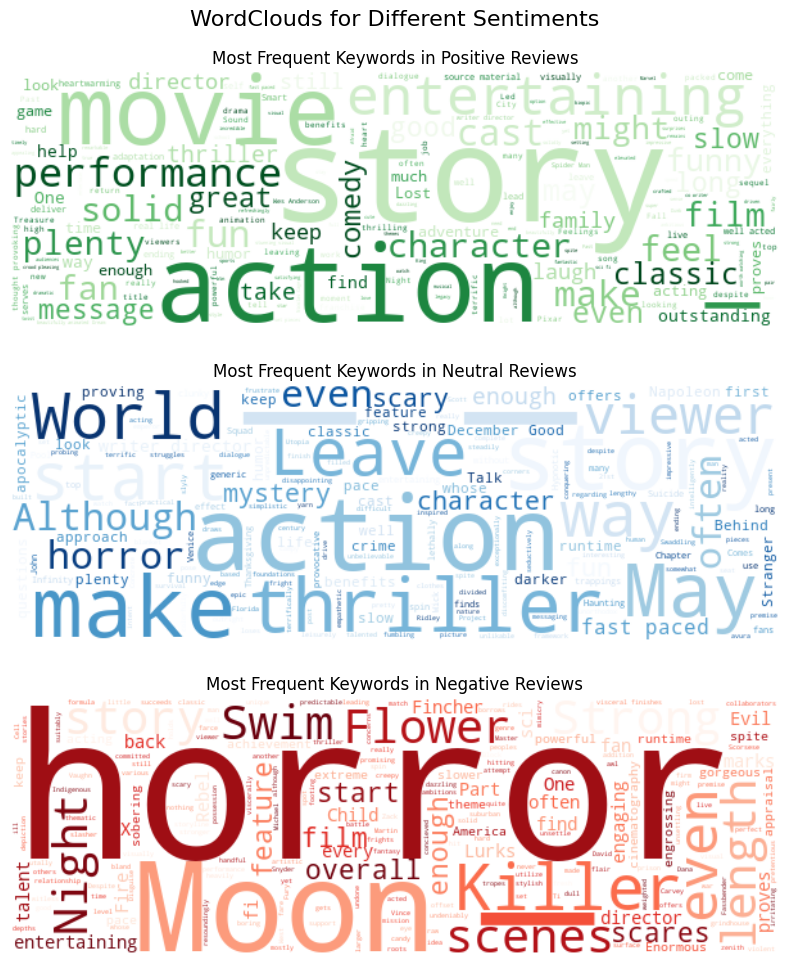

In [ ]:
vader_type = ['Positive', 'Neutral', 'Negative']
cmap_list = ['Greens', 'Blues', 'Reds']

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

for n, sentiment in enumerate(vader_type):
    text = " ".join(review.strip() for review in df_merge_vader[df_merge_vader['VaderSegment'] == sentiment]['Consensus Text']\
                    .str.replace('br',' ')\
                    .str.replace('Br',' ')\
                    )
    
    wc = WordCloud(width=600, height=200, background_color='white', colormap=cmap_list[n]).generate(text)

    axes[n].imshow(wc, interpolation='bilinear')
    axes[n].set_title(f'Most Frequent Keywords in {sentiment} Reviews')
    axes[n].axis('off')

plt.suptitle('WordClouds for Different Sentiments', fontsize=16)
plt.tight_layout()
plt.show()

These Wordclouds showed the most frequently occurring words in each type of consensus text 

# 6. Recommendation for movie chosen

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display, Image as IPImage

In [ ]:
# Get Movie URL
def get_final_redirect_url(url):
    response = requests.head(url, allow_redirects=True)
    return response.url

# Get Movie posters
def download_and_visualize_image(image_url, title):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    display(IPImage(data=response.content, format='png'))
    return image

### TOP 10 MUST-WATCH MOVIES

1. Name: WONKA
Genre: Kids & family, Musical, Comedy, Fantasy
Duration: 116
Redirect URL: https://www.rottentomatoes.com/m/wonka


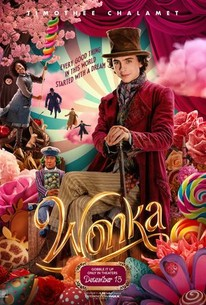

2. Name: ANATOMY OF A FALL
Genre: Mystery & thriller, Crime, Drama
Duration: 150
Redirect URL: https://www.rottentomatoes.com/m/anatomy_of_a_fall


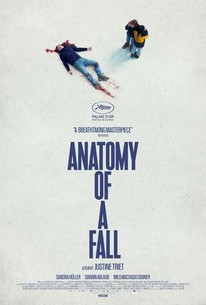

3. Name: THE HOLDOVERS
Genre: Holiday, Comedy, Drama
Duration: 133
Redirect URL: https://www.rottentomatoes.com/m/the_holdovers


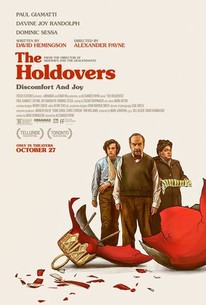

4. Name: SOCIETY OF THE SNOW
Genre: Drama, Adventure, Biography
Duration: 144
Redirect URL: https://www.rottentomatoes.com/m/society_of_the_snow


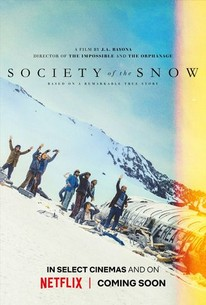

5. Name: DUMB MONEY
Genre: Comedy, Drama
Duration: 105
Redirect URL: https://www.rottentomatoes.com/m/dumb_money


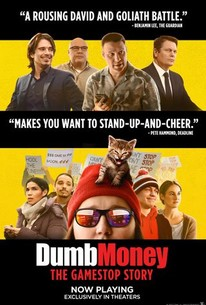

6. Name: OPPENHEIMER
Genre: History, Drama, Biography
Duration: 180
Redirect URL: https://www.rottentomatoes.com/m/oppenheimer_2023


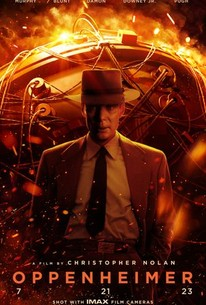

7. Name: PAST LIVES
Genre: Romance, Drama
Duration: 106
Redirect URL: https://www.rottentomatoes.com/m/past_lives


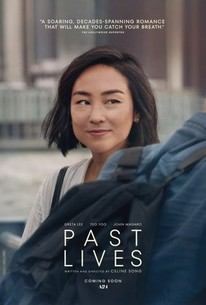

8. Name: MAESTRO
Genre: Biography, Drama, Romance, Music, Lgbtq+
Duration: 129
Redirect URL: https://www.rottentomatoes.com/m/maestro_2023


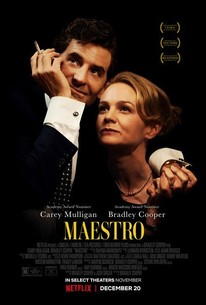

9. Name: TURNING RED
Genre: Kids & family, Comedy, Fantasy, Animation
Duration: 100
Redirect URL: https://www.rottentomatoes.com/m/turning_red


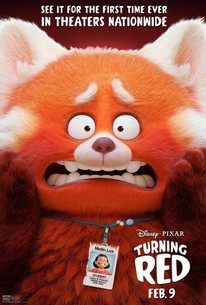

10. Name: SELF RELIANCE
Genre: Comedy, Mystery & thriller
Duration: 89
Redirect URL: https://www.rottentomatoes.com/m/self_reliance


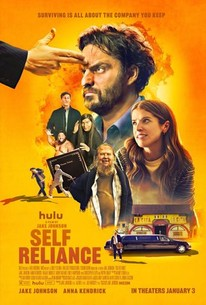

In [ ]:
top_10_must_watch = df_merge_vader[(df_merge_vader['Audience Sentiment'] == 'positive')&
               (df_merge_vader['Critics Sentiment'] == 'positive')&
               (df_merge_vader['Audience State'] == 'upright')&
               (df_merge_vader['Critics State'] == 'certified-fresh')&
               (df_merge_vader['VaderSegment'] == 'Positive')].sort_values(by = 'Avg Score', ascending = False).head(10).reset_index(drop = True)

for index, movie in top_10_must_watch.iterrows():
    print(f"{index + 1}. Name: {movie['Movie Title']}")
    print(f"Genre: {movie['Genre']}")
    print(f"Duration: {movie['Duration']}")

    # Get URL
    final_redirect_url = get_final_redirect_url(movie["Link URL"])
    print(f"Redirect URL: {final_redirect_url}")

    # Get Poster
    image = download_and_visualize_image(movie["Image URL"], movie["Movie Title"])

## The End 🤗